# INTRODUCTION

This notebook aims to take you through the basics of image processing - colormap schemes, image filtering and feature/edge detection

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.ndimage 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import zipfile

In [2]:
import skimage

Let's take a look at what's in the data. To do this, we utilise the glob module and its associated method to help us read directly from the zip file. Furthermore since there are too many images in the zip file to extract all ( I tried and it cause an error in the notebook), I will look at only the first 25 images in the set as follows:

In [3]:
18# Create a new list to hold the names of the first 25 jpg images
filelist = ['BDRW_train_1/digit_0.jpg',
 'BDRW_train_1/digit_1.jpg',
 'BDRW_train_1/digit_10.jpg',
 'BDRW_train_1/digit_100.jpg',
 'BDRW_train_1/digit_1000.jpg',
 'BDRW_train_1/digit_1001.jpg',
 'BDRW_train_1/digit_1002.jpg',
 'BDRW_train_1/digit_1003.jpg',
 'BDRW_train_1/digit_1005.jpg',
 'BDRW_train_1/digit_1006.jpg',
 'BDRW_train_1/digit_1007.jpg',
 'BDRW_train_1/digit_1008.jpg',
 'BDRW_train_1/digit_1009.jpg',
 'BDRW_train_1/digit_101.jpg',
 'BDRW_train_1/digit_1011.jpg',
 'BDRW_train_1/digit_1012.jpg',
 'BDRW_train_1/digit_1013.jpg',
 'BDRW_train_1/digit_1014.jpg',
 'BDRW_train_1/digit_1015.jpg',
 'BDRW_train_1/digit_1016.jpg',
 'BDRW_train_1/digit_1017.jpg',
 'BDRW_train_1/digit_1018.jpg',
 'BDRW_train_1/digit_102.jpg',
 'BDRW_train_1/digit_1020.jpg',
 'BDRW_train_1/digit_1021.jpg']

In [4]:
z = zipfile.ZipFile('../input/BDRW_train/BDRW_train_1.zip', "r")
for name in z.namelist():
    if name in filelist:
        z.extract(name)

In [5]:
train = [f for f in glob.glob("BDRW_train_1/*")]

# QUICK PEEK 

All right, with that as a starter let's look at somemore digits to get an idea of what we might be dealing with. I will load in 16 images from the dataset 

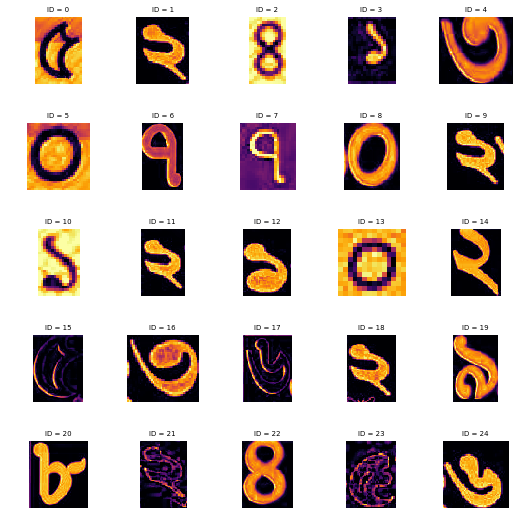

In [6]:
i = 0
plt.figure(figsize=(7.5,7.5))
for k in train:
    img = mpimg.imread(k)
    plt.subplot(5,5,i+1); plt.imshow(img[:,:,0],cmap=plt.cm.inferno_r); plt.axis('off')
    plt.title('ID = ' + str(i), fontsize=7)
    i += 1
plt.tight_layout()

# PLAYING WITH DIFFERENT COLORMAPS

All right, now that we have loaded in the image files ( the files are all of .jpg extensions), let's load in an image and play around with different colormaps as a starter ( something easy on the brain and pleasing visually). 

Colormaps help one to project in image in different combinations and contrasts of colors. Choosing the right scheme does serve to portray the story of ones' plot in a more intuitive or visual manner. 

We will use Matplotlib's colormaps in this notebook to visualise some of the Bengali digits in different variations of colors. For ease of convenience, I have chosen a particular Bengali digit for its nice color contrast and clearly defined edges - **BDRW_train_1/digit_1011.jpg**. 

For more information about colormaps and how they affect human psychology, please check the links 

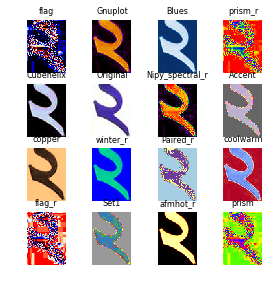

In [7]:
# Try different Color schemes 
# Make sure we have our particular Bengali digit of interest by ensuring that we always call the right index
for index,name in enumerate(train):
    if name == 'BDRW_train_1/digit_1011.jpg':
        plt.figure(figsize=(4.5,4.5))
        plt.subplot(441)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.flag)
        plt.title('flag', fontsize=8)
        plt.axis('off')
        
        plt.subplot(442)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.gnuplot_r)
        plt.title('Gnuplot', fontsize=8)
        plt.axis('off')
        
        plt.subplot(443)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.Blues)
        plt.title('Blues', fontsize=8)
        plt.axis('off')
        
        plt.subplot(444)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.prism_r)
        plt.title('prism_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(445)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.cubehelix_r)
        plt.title('Cubehelix', fontsize=8)
        plt.axis('off')
        
        plt.subplot(446)
        plt.imshow(mpimg.imread(train[index])[:,:,:])
        plt.title('Original', fontsize=8)
        plt.axis('off')
        
        plt.subplot(447)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.nipy_spectral_r)
        plt.title('Nipy_spectral_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(448)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.Accent)
        plt.title('Accent', fontsize=8)
        plt.axis('off')
        
        plt.subplot(449)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.copper)
        plt.title('copper', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,10)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.winter_r)
        plt.title('winter_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,11)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.Paired_r)
        plt.title('Paired_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,12)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.coolwarm)
        plt.title('coolwarm', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,13)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.flag_r)
        plt.title('flag_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,14)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.Set1)
        plt.title('Set1', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,15)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.afmhot_r)
        plt.title('afmhot_r', fontsize=8)
        plt.axis('off')
        
        plt.subplot(4,4,16)
        plt.imshow(mpimg.imread(train[index])[:,:,0],cmap=plt.cm.prism)
        plt.title('prism', fontsize=8)
        plt.axis('off')

# FILTERING 

In this section, we will try out different techniques available for filtering of images. Thankfully the immensely powerful SciPy library already ships with many inbuilt filter methods available. In this notebook I will attempt to walkthrough most of these filters,. These filters are listed togther with their generic functions as below below

**Smoothing & Blurring** : Gaussian, Uniform filters

**Sharpening** : Maximum filter

**Removing Noise** : Uniform filter

Now onto the first group of filters, those that serve the purpose of blurring our images

### Blurring

Using SciPy's multidimensional image processing package **ndimage**, this allows us to invoke our filters of interest - Gaussian and Uniform filters conveniently via the standard python method call

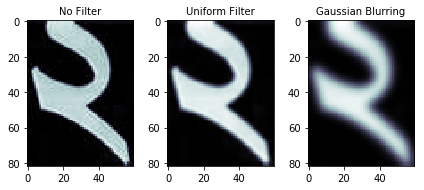

In [8]:
for index,name in enumerate(train):
    if name == 'BDRW_train_1/digit_1011.jpg':
        plt.figure(figsize=(6,6))
        
        plt.subplot(131)
        plt.imshow(mpimg.imread(train[index])[:,:,0], cmap=plt.cm.bone_r)
        plt.title('No Filter', fontsize=10)
        
        plt.subplot(132)
        plt.imshow(scipy.ndimage.uniform_filter(mpimg.imread(train[index])[:,:,0]),cmap=plt.cm.bone_r)
        plt.title('Uniform Filter', fontsize=10)
        
        plt.subplot(133)
        plt.imshow(scipy.ndimage.gaussian_filter(mpimg.imread(train[index])[:,:,0],2.5),cmap=plt.cm.bone_r)
        plt.title('Gaussian Blurring', fontsize=10)
        plt.tight_layout()

### Sharpening

Mathematically, the idea behind the simplest image sharpening implementation is that of increasing the weightage of the edges of an image, therefore allowing the image to appear even sharper than its original

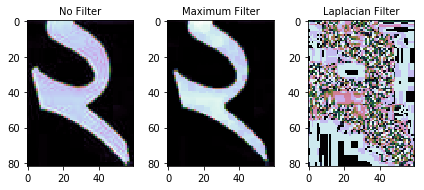

In [9]:
for index,name in enumerate(train):
    if name == 'BDRW_train_1/digit_1011.jpg':
        plt.figure(figsize=(6,6))
        
        plt.subplot(131)
        plt.imshow(mpimg.imread(train[index])[:,:,0], cmap=plt.cm.cubehelix_r)
        plt.title('No Filter', fontsize=10)
        
        plt.subplot(132)
        plt.imshow(scipy.ndimage.maximum_filter(mpimg.imread(train[index])[:,:,0],3.5), cmap=plt.cm.cubehelix_r)
        plt.title('Maximum Filter', fontsize=10)
        
        plt.subplot(133)
        img = mpimg.imread(train[index])[:,:,0]
        alpha = 30
        sharpened = img + alpha * (img - scipy.ndimage.gaussian_filter(mpimg.imread(train[index])[:,:,0],1))
        plt.imshow(sharpened,cmap=plt.cm.cubehelix_r )
        plt.title('Laplacian Filter', fontsize=10)
        plt.tight_layout()

STILL NEED TO WORK ON LAPLACIAN FILTER!!

**Denoising**



AttributeError: module 'skimage' has no attribute 'filter'

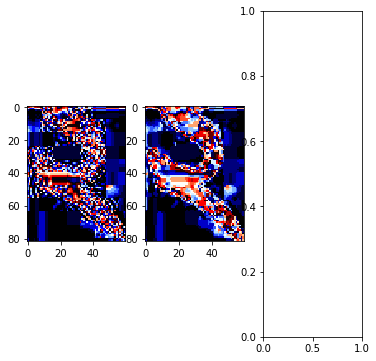

In [10]:
for index,name in enumerate(train):
    if name == 'BDRW_train_1/digit_1011.jpg':
        plt.figure(figsize=(6,6))
        
        plt.subplot(131)
        plt.imshow(mpimg.imread(train[index])[:,:,0], cmap=plt.cm.flag)
        
        plt.subplot(132)
        plt.imshow(scipy.ndimage.median_filter(mpimg.imread(train[index])[:,:,0],3),cmap=plt.cm.flag)
        
        plt.subplot(133)
        plt.imshow(skimage.filter.denoise_bilateral(mpimg.imread(train[index])[:,:,:]),cmap=plt.cm.flag)
        plt.tight_layout()

# MATHEMATICAL OPERATIONS

Simple mathematical operations can also be performed on your images. For example selecting all elements in the image that are above (or below ) a certain threshold

In [11]:
mpimg.imread(train[index])[:,:,0] < 65

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

Here's the evolution of how the image would look like if we moved this threshold

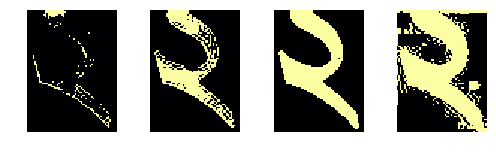

In [12]:
for index,name in enumerate(train):
    if name == 'BDRW_train_1/digit_1011.jpg':
        plt.figure(figsize=(7,7))
        
        plt.subplot(141)
        img = mpimg.imread(train[index])[:,:,0] > 60
        plt.imshow(img, cmap=plt.cm.inferno_r)
        plt.axis('off')
        
        plt.subplot(142)
        img = mpimg.imread(train[index])[:,:,0] > 75
        plt.imshow(img,cmap=plt.cm.inferno_r)
        plt.axis('off')
        
        plt.subplot(143)
        img = mpimg.imread(train[index])[:,:,0] > 100
        plt.imshow(img,cmap=plt.cm.inferno_r)
        plt.axis('off')
        
        plt.subplot(144)
        img = mpimg.imread(train[index])[:,:,0] > 250
        plt.imshow(img,cmap=plt.cm.inferno_r)
        plt.axis('off')
        plt.tight_layout()

# FEATURE EXTRACTION

**Otsu Feature Extraction method**

In [13]:
# Import the relevant modules to call Otsu THresholding
from skimage import data
from skimage import filters

In [14]:
img = mpimg.imread(train[index])[:,:,:]
plt.figure(figsize=(4,4))
val = filters.threshold_otsu(img)
mask = img < val

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(mask)
plt.tight_layout()

/opt/conda/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (52, 51, 3) looks like an RGB image
  warn(msg.format(image.shape))


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

# IMAGE SEPARATION 